In [1]:
from openai import OpenAI
from dotenv import load_dotenv
from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import PyPDFDirectoryLoader
from langchain_openai import OpenAIEmbeddings
import numpy as np

import os
from Utils.embedding import plot_results


load_dotenv()

client = OpenAI()
embeddings = OpenAIEmbeddings(model="text-embedding-3-large", chunk_size=1)
test_text_embeddings = [
    "Für was steht UNA?",
    "Für was steht UNH?",
    "Für was steht DTM?",
    "Für was steht RFF?",
    "Für was steht NAD?",
    "Für was steht LIN?",
    "Für was steht BGM?",
    "Was ist Bezeichnung für Trennzeichen?",
    "Was ist Bezeichnung für Gesetzlich vorgeschriebener Text?",
    "Was ist Bezeichnung für Nachrichtendatum?",
]
pdf_directory = "pdfs"
if os.path.exists("feiss_index/index.faiss") and os.path.exists(
    "feiss_index/index.pkl"
):
    print(f"Loading existing FAISS index from")
    faiss_index = FAISS.load_local("feiss_index", embeddings= embeddings,allow_dangerous_deserialization=True)
else:
    print(f"Creating new FAISS index and saving to")
    pdf_files = [
        os.path.join(pdf_directory, file)
        for file in os.listdir(pdf_directory)
        if file.endswith(".pdf")
    ]

    pages = []
    loader = PyPDFDirectoryLoader(pdf_directory, extract_images=False)
    pages = loader.load_and_split()

    faiss_index = FAISS.from_documents(pages, embeddings)

Creating new FAISS index and saving to


Erstelle eine Matrix mit jedem Embedding, aber mit verändertem K-Parameter. So kannst du die Unterschiede besser analysieren.

In [ ]:
results_score = np.zeros((10, 20))
results_embedding = []
for i in range(10):
    results_score[i, :] = np.array(
        faiss_index.similarity_search_with_score(test_text_embeddings[i], 20)
    )[:, 1]
    results_embedding.append(
        faiss_index.similarity_search(test_text_embeddings[i], 20)
    )

Visualisierung der Scores zu den einzelnen Fragen.

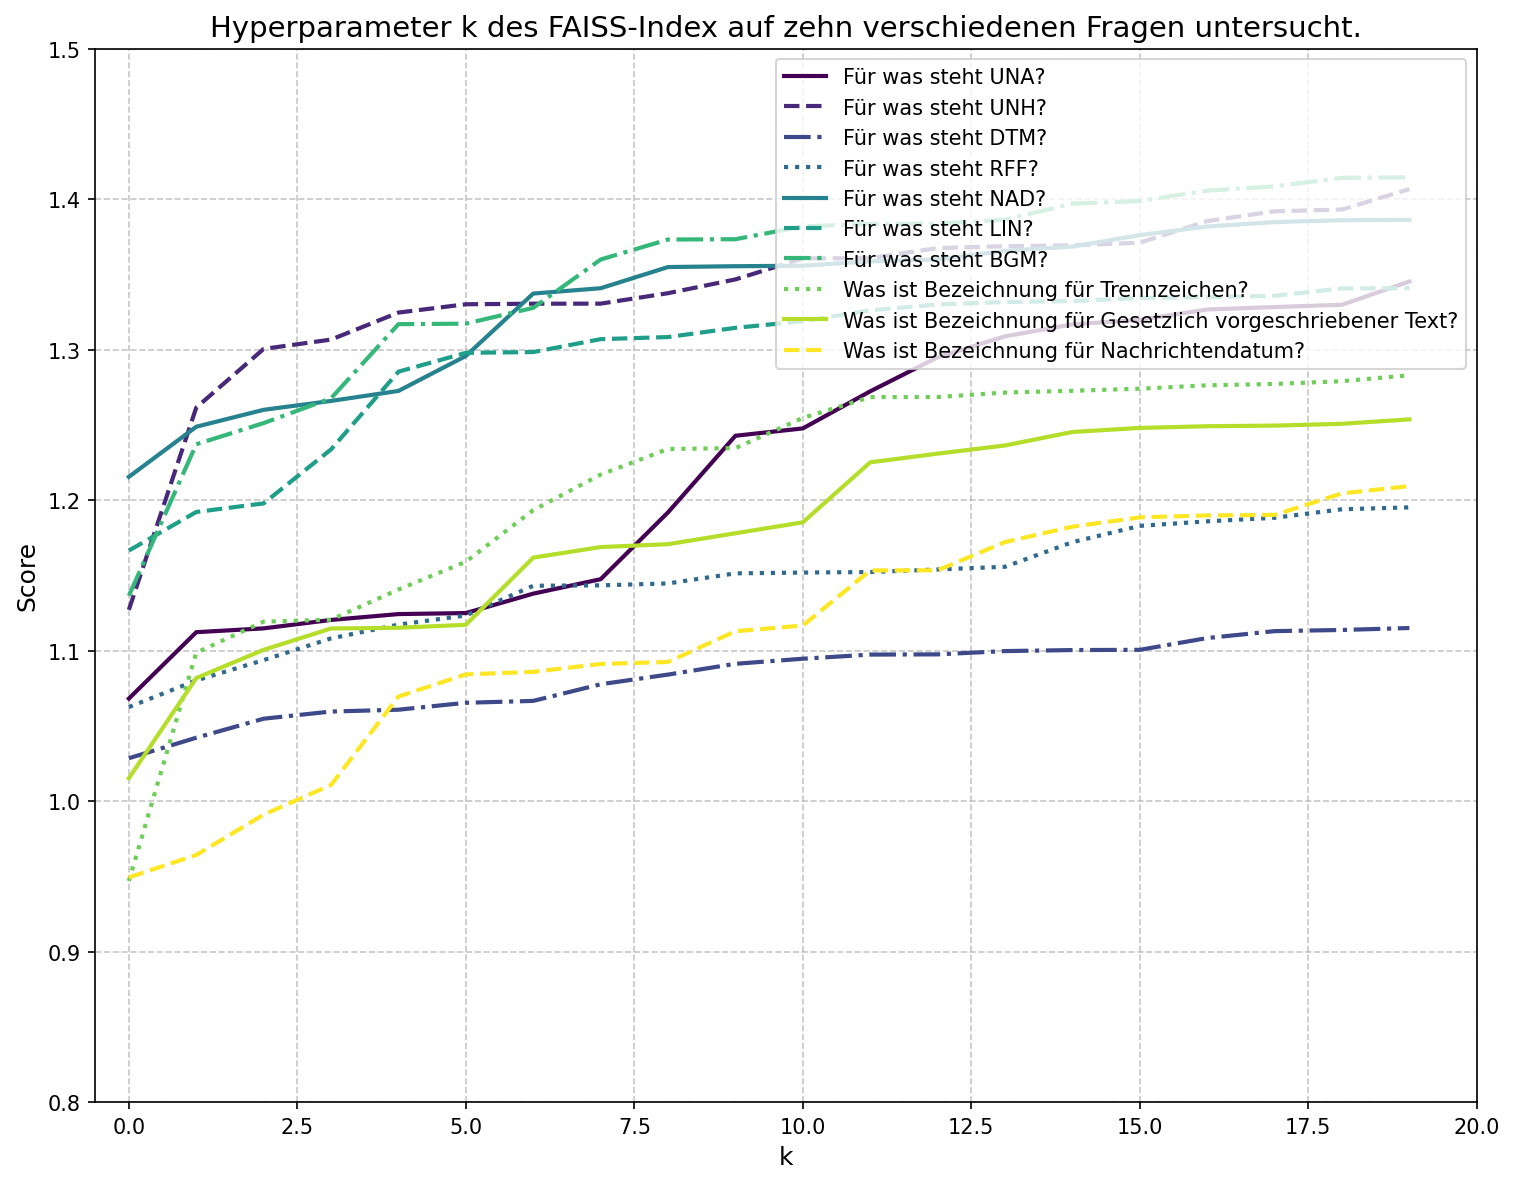

In [ ]:
plot_results(
    results_score,
    test_text_embeddings,
    xlim=(-0.5, 20),
    ylim=(0.8, 1.5),
    titel="Hyperparameter k des FAISS-Index auf zehn verschiedenen Fragen untersucht.",
)

Betrachten wir nun die besten Ergebnis für die Frage "Was bedeutet UNA? Das Ergebnis zeigt, dass die richtigen Informationen ausgewählt wurden, wie aus dem PDF-Auszug ersichtlich ist.

In [ ]:
print("1.------------------------------------------------")
print(results_embedding[0][0].page_content)
print("2.------------------------------------------------")
print(results_embedding[0][1].page_content)
print("3.------------------------------------------------")
print(results_embedding[0][3].page_content)

1.------------------------------------------------
EDI Implementation Guidelines  Anwendungshandbuch  
4 Segmentbeschreibung
Bez = Bezeichner, St = Status  Nr Bez St MaxWdh  Ebene  Name  
1 UNA  O 1 0 Trennzeichen -Vorgabe  
Standard  Implementation  
Bez Name  St Format  St Format  Anwendung / Bemerkung  
UNA1  Gruppendatenelem  
ent-Trennzeichen  M an1 an1 Doppelpunkt  
UNA2  Segment - 
Bezeichner - und 
Datenelement - 
Trennzeichen  M an1 an1 Pluszeichen  
UNA3  Dezimalzeichen  M an1 an1 Punkt  
UNA4  Freigabezeichen  M an1 an1 Fragezeichen  
UNA 5 Reserviert für  
spätere  
Verwendung  M an1 an1 Leerzeichen  
UNA6  Segment - 
Endezeichen  M an1 an1 Hochkomma  
Bemerkung:  
Beispiel:  
UNA:+.? '  
29.11.2016  
Seite: 9 20.01.2021 
Seite: 22Porsche VDA 4938 T4 - Global INVOIC
© Dr. Ing. h.c. F. Porsche AG Version PORSCHE: 1.0 Variante: Frachtrechnung/Freight invoice
2.------------------------------------------------
VDA-Empfehlung  4938  Version 1.1  , April 2012  Seite  29  von 157 

Betrachten wir nun das schlechteste Ergebnis für die Frage "Was bedeutet FTX? Das Ergebnis zeigt, dass nur teilweise richtige Informationen ausgewählt wurden, wie im PDF-Auszug zu sehen ist, da es sich hier um ein Untersegment handelt.

In [ ]:
print(results_embedding[0][5].page_content)

EDI Implementation Guidelines  Anwendungshandbuch  
 
 
4 Segmentbeschreibung  
 
 
Bez = Bezeichner, St = Status  
Volkswagen VDA 4938 T4 - Global INVOIC  29.11.2016  
Version:  VDA 2.2 -VW 1.0  Variante:  Frachtrechnung/Freight Invoice  
© Volkswagen Aktiengesellschaft  Seite:  22  
  
 Nr Bez St MaxWdh  Ebene  Name  
 1  UNA  O 1 0 Trennzeichen -Vorgabe  
 
 Standard  Implementation  
Bez Name   St Format  St Format  Anwendung / Bemerkung  
UNA1  Gruppendatenelem  
ent-Trennzeichen   M an1  an1 Doppelpunkt  
UNA2  Segment - 
Bezeichner - und 
Datenelement - 
Trennzeichen   M an1  an1 Pluszeichen  
UNA3  Dezimalzeichen   M an1  an1 Punkt  
UNA4  Freigabezeichen   M an1  an1 Fragezeichen  
UNA 5 Reserviert für  
spätere  
Verwendung   M an1  an1 Leerzeichen  
UNA6  Segment - 
Endezeichen   M an1  an1 Hochkomma  
Bemerkung:  
Beispiel:  
UNA:+.? '
